In [2]:
import numpy as np
import librosa as lr
from pathlib import Path
import torch
import auraloss

from kymatio_audio import scattering_audio_distance as sad

from IPython import display as ipd
plt.rcParams['figure.figsize'] = [6, 3]

In [3]:
import glob

data_path = '/Users/lagrange/data/_OrchideaSOL2020_release/OrchideaSOL2020/'

classes = ['Strings']
instruments = ['Violin']
names = ['Vn', 'Fl']
pitch = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
techniques = ['tremolo']
t_names = ['trem']
files = []
for ci, c in enumerate(classes):
    for pi, p in enumerate(pitch):
        card = data_path+c+'/'+instruments[ci]+'/ordinario/'+names[ci]+'-ord-'+p+'4-mf-*.wav'
        g = glob.glob(card)
        files.append(g[0])

for ci, c in enumerate(classes):
    for pi, p in enumerate(pitch):
        card = data_path+c+'/'+instruments[ci]+'/'+techniques[ci]+'/'+names[ci]+'-'+t_names[ci]+'-'+p+'4-mf-*.wav'
        g = glob.glob(card)
        files.append(g[0])

audio = []
 
for f in files: 
    data, sr = lr.load(f, sr = 22050, mono = True, duration = 1.5)   
    audio.append(data)

a = np.hstack(audio)
import scipy.io.wavfile
scipy.io.wavfile.write('demo/technique.wav', sr, a)

ipd.Audio(a, rate=sr)

In [19]:
mss_distances = sad.multiscale_audio_distance(audio, sr)

Max num samples 33075
Max duration 1.5 seconds.


In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# from sklearn.manifold import TSNE
# emb = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, metric='precomputed').fit_transform(distances)
# from sklearn.manifold import Isomap
# emb = Isomap(n_components=2, metric='precomputed').fit_transform(distances)

def plot_dist(distances, dist_type):

    emb = MDS(n_components=2, dissimilarity='precomputed', random_state=0).fit_transform(distances)

    handles = []
    labels = ['Violin ordinario', 'Violin tremolo']
    for k in range(2):    
        handles.append(plt.scatter(emb[k*12:(k+1)*12, 0], emb[k*12:(k+1)*12, 1], sizes=(np.arange(12)+1)*8, label=labels[k]))
        plt.plot(emb[k*12:(k+1)*12, 0], emb[k*12:(k+1)*12, 1], linewidth=.3)

    plt.legend(handles=handles)
    plt.title(dist_type)
    plt.xticks([]),plt.yticks([])
    plt.savefig('demo/technique_'+dist_type+'.png')
    plt.show()
    

/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


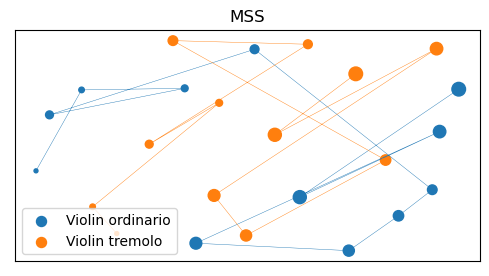

In [21]:
plot_dist(mss_distances, 'mss')

In [22]:
scattering_distances = sad.scattering_audio_distance(audio, sr)

Max num samples 33075
Max duration 1.5 seconds.
Time support: 2.972154195011338 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


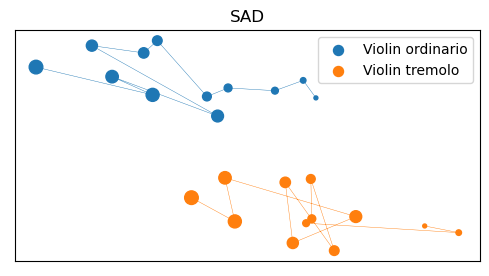

In [23]:

plot_dist(scattering_distances, 'sad')